In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

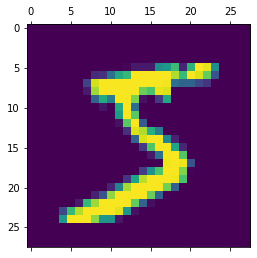

In [6]:
plt.matshow(x_train[0])

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
x_train = x_train / 255
x_test = x_test / 255
#scall

In [9]:
x_train_flattend = x_train.reshape(len(x_train),28*28)
x_test_flattend = x_test.reshape(len(x_test),28*28)
x_train_flattend

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4654 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3033 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2836 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2664 - accuracy: 0.9258


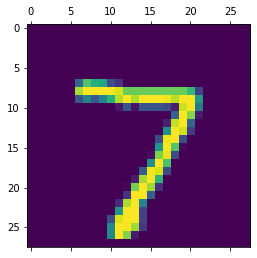

In [11]:
plt.matshow(x_test[0])

In [12]:
y_predict = model.predict(x_test_flattend)

313/313 [==============================] - 0s 1ms/step


In [13]:
y_predict[0]

array([1.2574264e-02, 2.8501972e-07, 4.9202815e-02, 9.6093267e-01,
       1.9879946e-03, 1.0471790e-01, 2.0670227e-06, 9.9977243e-01,
       8.4598154e-02, 5.4262334e-01], dtype=float32)

In [14]:
np.argmax(y_predict[0])

7

In [15]:
y_predict_label = [np.argmax(i) for i in y_predict]
y_predict_label[:5]

[7, 2, 1, 0, 4]

In [17]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    1,    2,    0,    7,   11,    2,    3,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   5,    8,  906,   28,    7,    4,   13,   11,   48,    2],
       [   1,    0,   14,  936,    0,   18,    3,   11,   21,    6],
       [   1,    1,    4,    2,  908,    0,   14,    4,   12,   36],
       [   7,    1,    2,   43,    7,  774,   15,    4,   33,    6],
       [   6,    3,    4,    1,    7,   13,  919,    2,    3,    0],
       [   1,    5,   19,   11,    4,    0,    0,  956,    6,   26],
       [   4,    6,    6,   28,    8,   22,   10,   12,  873,    5],
       [   9,    6,    1,   13,   24,    5,    0,   28,   14,  909]])>

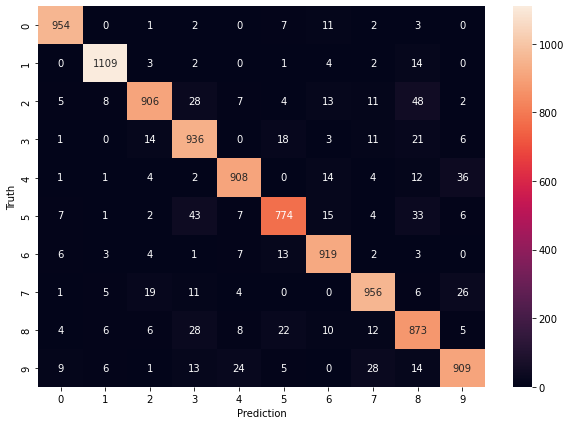

In [19]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2747 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1237 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0863 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9845


313/313 [==============================] - 1s 1ms/step


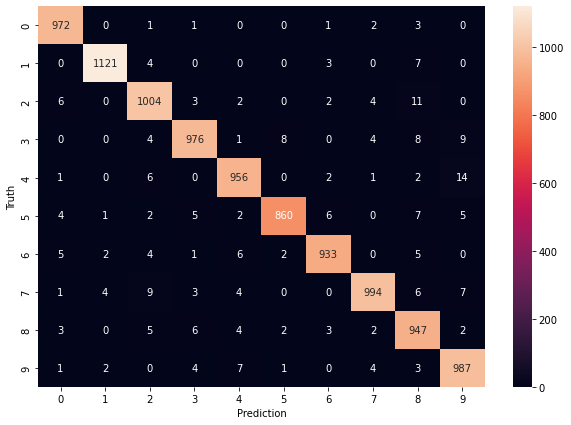

In [21]:
y_predict = model.predict(x_test_flattend)
y_predict_label = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(140,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2479 - accuracy: 0.9290
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1101 - accuracy: 0.9673
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0753 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0566 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0441 - accuracy: 0.9865


313/313 [==============================] - 1s 1ms/step


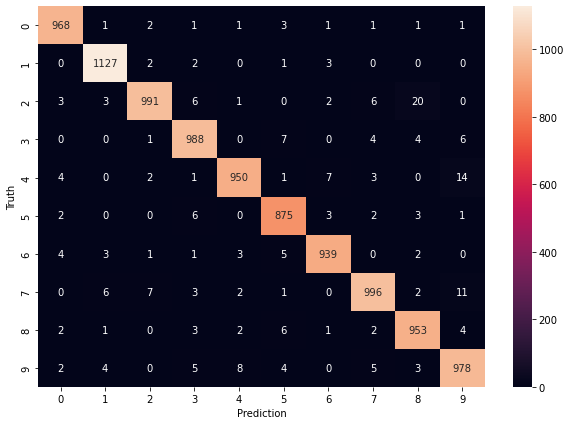

In [29]:
y_predict = model.predict(x_test)
y_predict_label = [np.argmax(i) for i in y_predict]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()